In [27]:
%pip install --upgrade pip
%pip install numpy pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

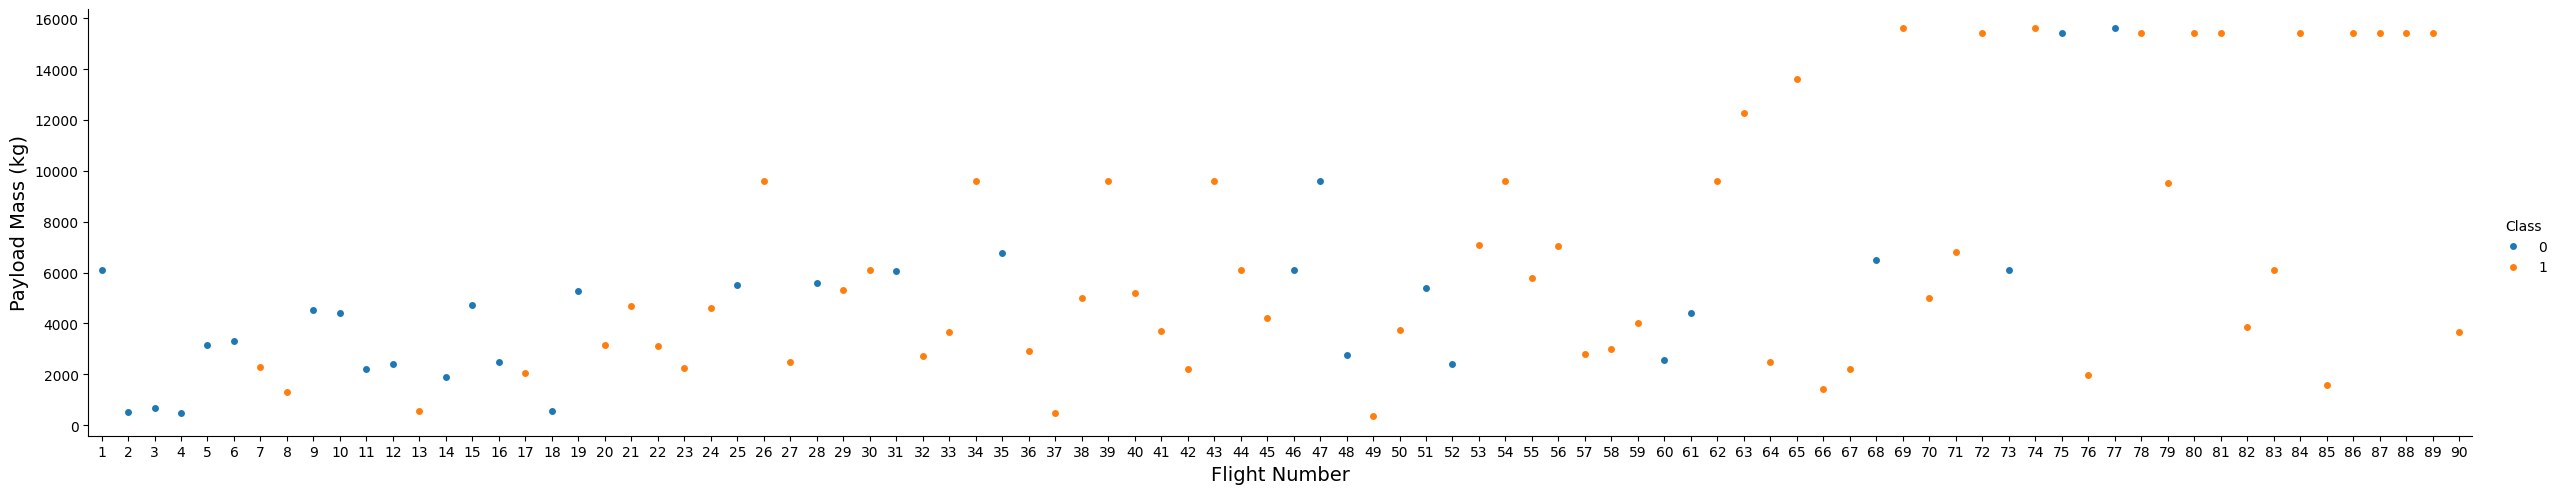

In [29]:
#Payload mass (kg)
sns.catplot(
    y="PayloadMass",
    x="FlightNumber",
    hue="Class",
    data=df,
    aspect=5
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.show()


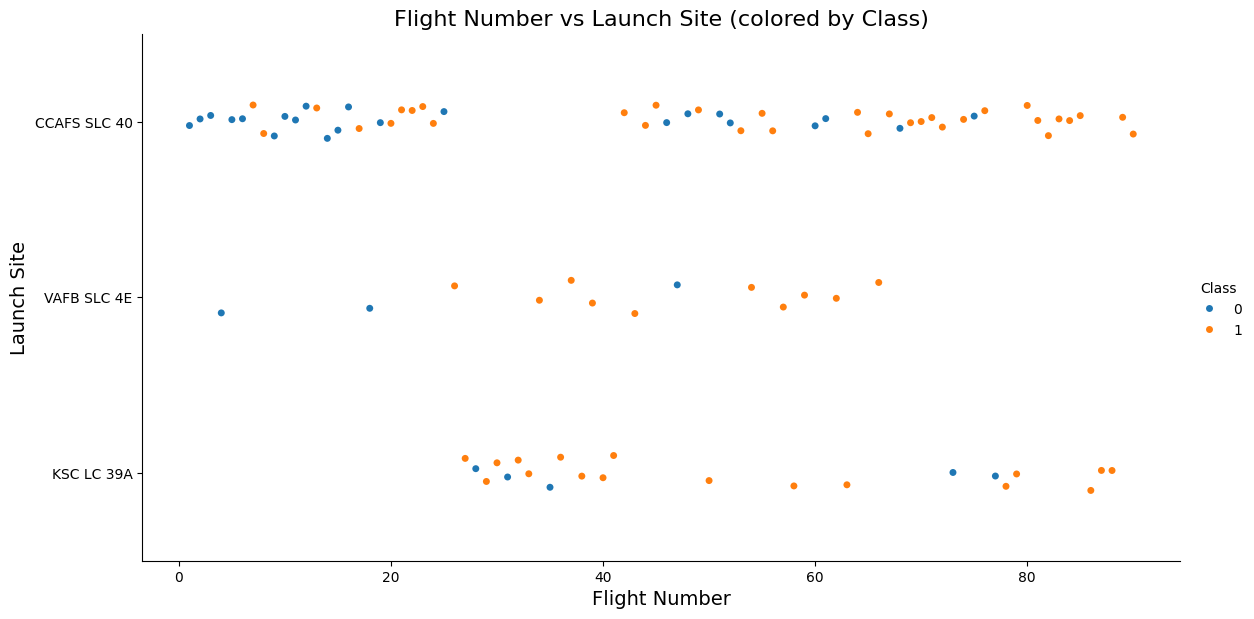

In [30]:
#Flight number vs launch site
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",   # point scatter
    height=6,
    aspect=2
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site (colored by Class)", fontsize=16)
plt.show()


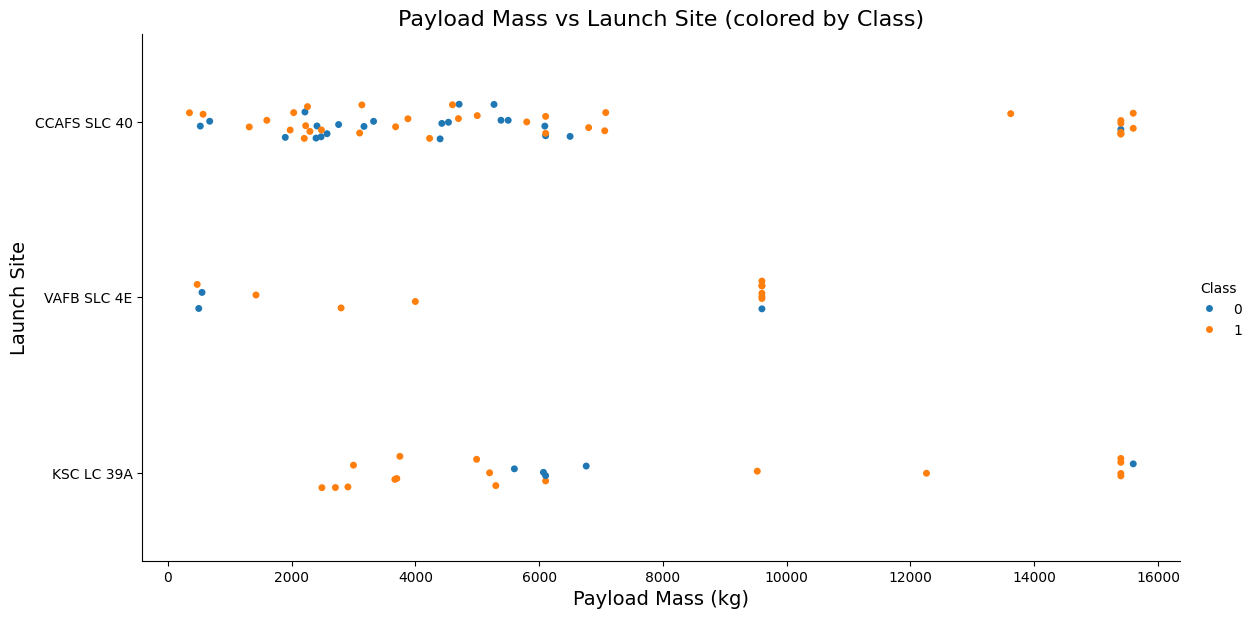

In [31]:
#Payload mass vs launch site
sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    kind="strip",
    height=6,
    aspect=2
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site (colored by Class)", fontsize=16)
plt.show()


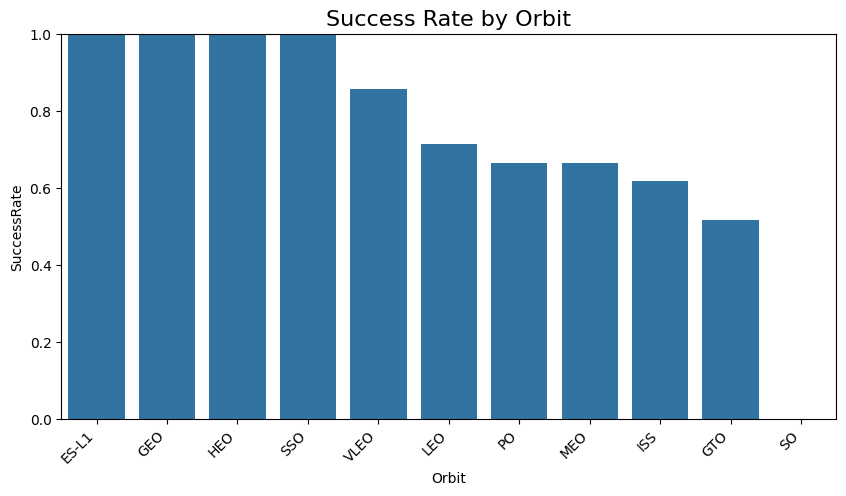

,Orbit,SuccessRate
0,ES-L1,1.000000
1,GEO,1.000000
2,HEO,1.000000
3,SSO,1.000000
4,VLEO,0.857143
5,LEO,0.714286
6,PO,0.666667
7,MEO,0.666667
8,ISS,0.619048
9,GTO,0.518519


In [32]:
#Success rate by orbit 
orbit_success = df.groupby("Orbit")["Class"].mean().sort_values(ascending=False)
orbit_success_df = orbit_success.reset_index().rename(columns={"Class":"SuccessRate"})

plt.figure(figsize=(10,5))
sns.barplot(data=orbit_success_df, x="Orbit", y="SuccessRate")
plt.ylim(0, 1)
plt.title("Success Rate by Orbit", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()

orbit_success_df


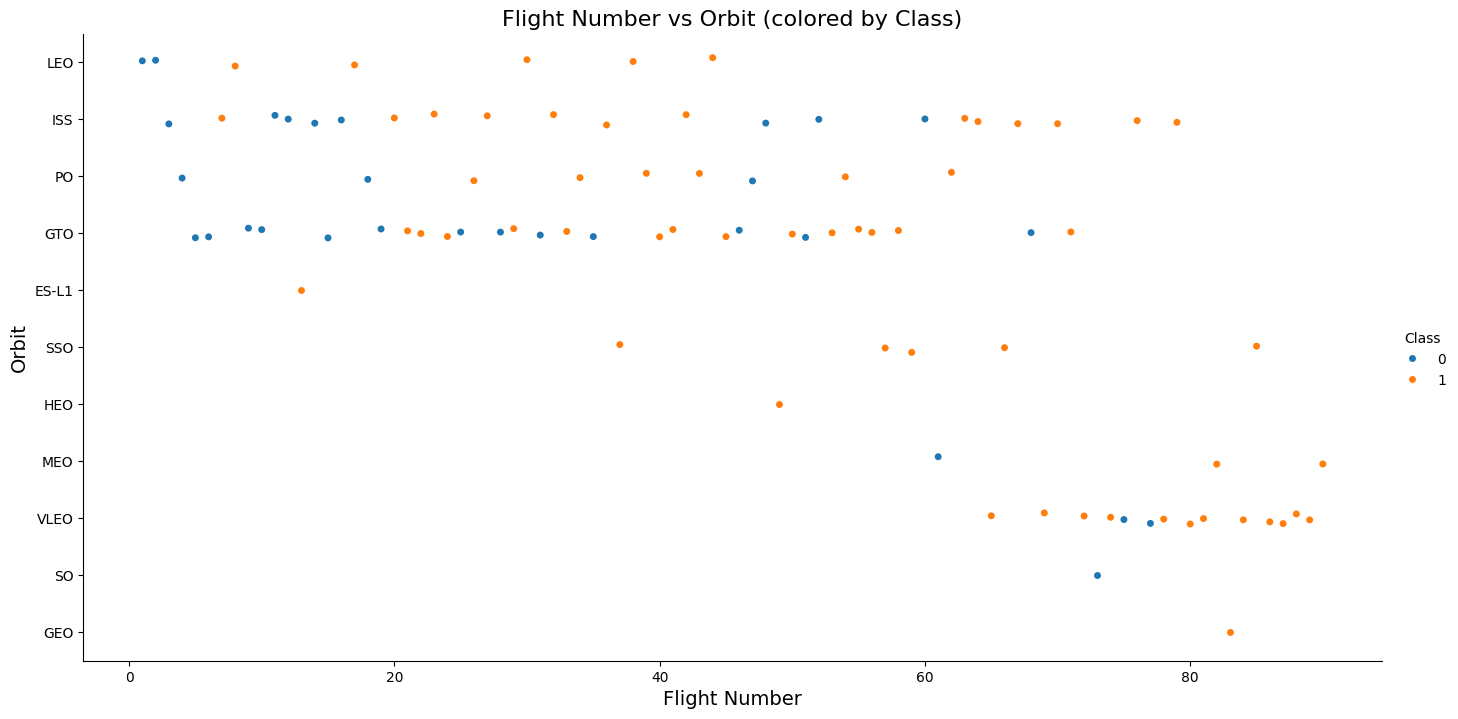

In [33]:
#Flight number vs orbit
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",
    height=7,
    aspect=2
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Flight Number vs Orbit (colored by Class)", fontsize=16)
plt.show()


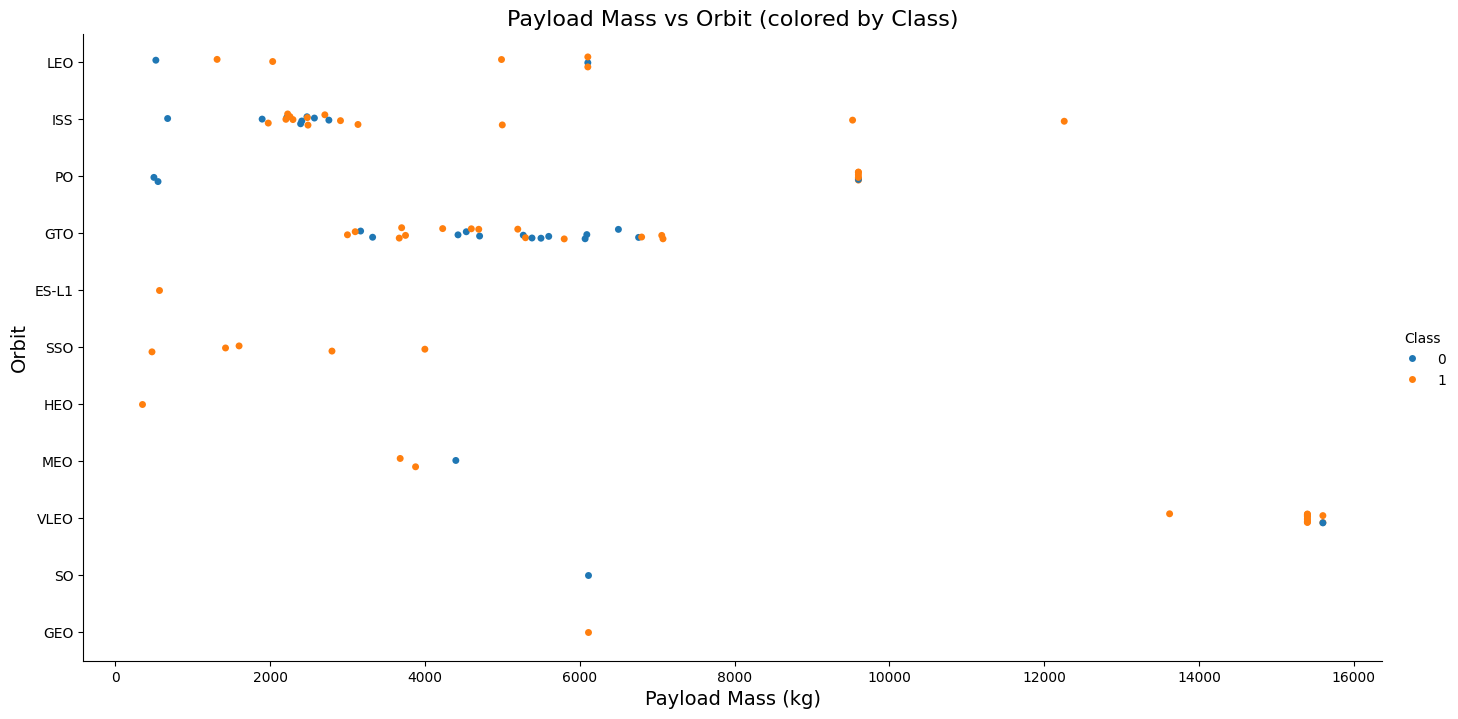

In [34]:
#Payload mass vs orbit
sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",
    height=7,
    aspect=2
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Payload Mass vs Orbit (colored by Class)", fontsize=16)
plt.show()


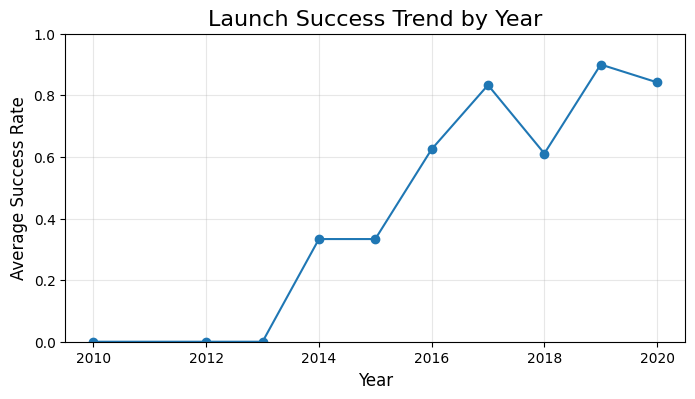

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


In [35]:
#Launch success trend by year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

yearly = df.groupby("Year")["Class"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(yearly["Year"], yearly["Class"], marker="o")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Success Rate", fontsize=12)
plt.title("Launch Success Trend by Year", fontsize=16)
plt.ylim(0,1)
plt.grid(True, alpha=0.3)
plt.show()

yearly
